In [10]:
# Import librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import produce_pca_files
import my_dataset
#import my_dataset_norm
#import my_dataset_norm2
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import csv
from sklearn.utils import Bunch
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier



In [17]:
#dataset = produce_pca_files.load_dataset()   #con riduzione pca
dataset = my_dataset.load_dataset()           #senza normalizzazione  
#dataset = my_dataset_norm.load_dataset()     #con normalizzazione  
#datasetN = my_dataset_norm2.load_dataset()    #con nuova normalizzazione

In [18]:
print(dataset.data.shape)
print(dataset.target.shape)

(240, 9800)
(240,)


In [19]:
print(dataset.data)

[[41.0 70.0 94.0 ... 25.0 44.0 18.0]
 [30.0 48.0 72.0 ... 27.0 47.0 21.0]
 [66.0 99.0 131.0 ... 36.0 71.0 37.0]
 ...
 [46.0 70.0 98.0 ... 23.0 47.0 24.0]
 [50.0 73.0 99.0 ... 22.0 45.0 23.0]
 [65.0 90.0 116.0 ... 29.0 54.0 25.0]]


In [65]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data,dataset.target, test_size=0.25)

In [66]:
y_train.size

180

In [67]:
y_test

array([4, 1, 2, 3, 2, 4, 4, 3, 3, 4, 2, 1, 1, 2, 2, 2, 4, 3, 2, 3, 3, 3,
       2, 4, 4, 2, 3, 3, 1, 3, 3, 1, 4, 1, 1, 3, 1, 3, 1, 3, 4, 4, 3, 2,
       1, 3, 1, 3, 2, 4, 1, 2, 4, 3, 3, 1, 4, 3, 1, 1])

In [92]:
 # // indice prova /// con 33 pca
#classifier = svm.SVC() #  a support vector classifier
#classifier = KNeighborsClassifier(5)  
#classifier = SVC(kernel="linear", C=0.025) 
#classifier = SVC(gamma=2, C=1) 
#classifier = GaussianProcessClassifier(1.0 * RBF(1.0))  
#classifier = DecisionTreeClassifier()  
#classifier = RandomForestClassifier(max_features=1)     #or 5 e 10 e 1
#classifier = MLPClassifier(alpha=1, max_iter=1000) 
#classifier = AdaBoostClassifier()  
classifier = GaussianNB()  
#classifier = QuadraticDiscriminantAnalysis() 
#classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
#classifier = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [93]:
classifier.fit(x_train,y_train)


GaussianNB()

In [94]:
predicted = classifier.predict(x_test)

In [95]:
accuracy_score(predicted,y_test)

0.35

In [274]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[ 5  5  7]
 [ 3 11  3]
 [ 1  5  8]]
Normalized confusion matrix
[[0.29411765 0.29411765 0.41176471]
 [0.17647059 0.64705882 0.17647059]
 [0.07142857 0.35714286 0.57142857]]


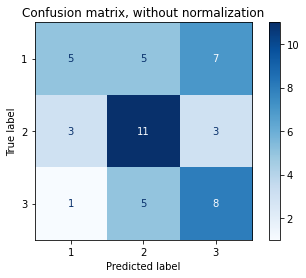

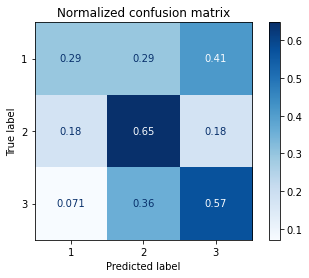

In [275]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()